In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/df18to21_cleanedH.csv')
census = pd.read_csv('../data/census_20.csv')

In [3]:
df.columns

Index(['sentence_length', 'year_sentenced', 'sentence_type', 'guideline_range',
       'imprisoned', 'guideline_var_pct', 'dependents', 'count_convictons',
       'race', 'disposition', 'citizen', 'state', 'criminal_hist', 'drug_type',
       'case_type', 'age', 'weapon', 'presentence_stat', 'gender',
       'crime_type', 'region', 'college', 'white'],
      dtype='object')

## Pie Chart (percentage of highest crimes)

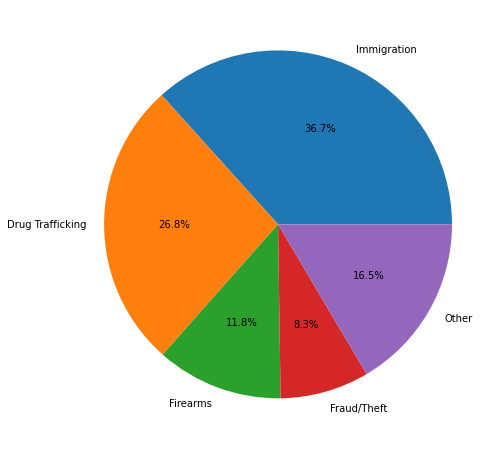

In [4]:
crime_df = pd.DataFrame(df['crime_type'].value_counts(normalize=True).head(4)) #, columns=['crime_type'])
crime_df.reset_index(inplace=True)
crime_df.loc[len(crime_df.index)] = [0, (1-crime_df['crime_type'].sum())]
crime_df['index'] = ['Immigration', 'Drug Trafficking', 'Firearms', 'Fraud/Theft', 'Other']
crime_df.columns = ['crime_type', 'percentage']

plt.figure(figsize=(8, 8))
plt.pie(crime_df['percentage'], labels=crime_df['crime_type'], autopct='%1.1f%%',);

Immigration makes up 36.7% of the crimes

## Sentence Length

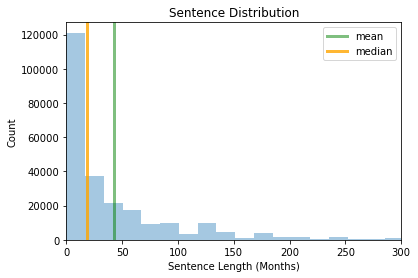

In [5]:
#referenced https://gist.github.com/cereniyim/df1c8646411cc34eb9720a79400a200f
# set the plot size
#plt.figure(figsize(12,10))

# set the histogram, mean and median
sns.distplot(df["sentence_length"], kde=False)
plt.axvline(x=df.sentence_length.mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=df.sentence_length.median(), linewidth=3, color='orange', label="median", alpha=0.8)

# set title, legends and labels
plt.xlabel("Sentence Length (Months)")
plt.xlim(0, 300)
plt.ylabel("Count")
plt.title("Sentence Distribution")
plt.legend(["mean", "median"]);

In [6]:
df.crime_type.value_counts()

17    90777
10    66326
13    29148
16    20470
26     5590
7      4651
21     4024
27     3838
30     3254
4      2580
1      2274
25     2061
9      1856
29     1760
24     1292
22     1110
5      1052
15      843
28      831
23      732
12      632
11      628
8       361
19      339
18      254
3       239
20      214
6       197
14      158
2        64
Name: crime_type, dtype: int64

In [7]:
df.sentence_length.mean()

42.871511381309205

In [8]:
df.sentence_length.median()

18.0

In [9]:
df.shape

(247555, 23)

## Gender

### Sentence length by gender (overlapped)

In [10]:
# creating separate dataframes based on gender
df_male = df[df['gender'] == 0]
df_female = df[df['gender'] == 1]

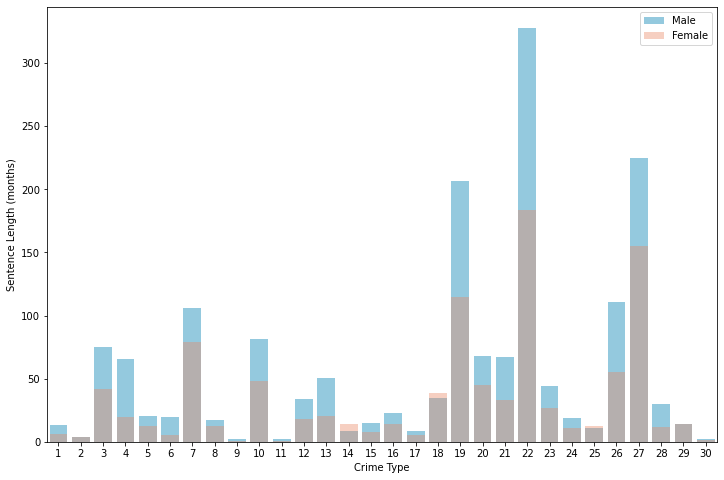

In [11]:
#referenced https://www.geeksforgeeks.org/how-to-overlap-two-barplots-in-seaborn/

# creating subplots
fig, ax = plt.subplots(1, 1, figsize=(12,8))

# plotting columns
ax = sns.barplot(x=df_male["crime_type"], y=df_male["sentence_length"], color='skyblue', ci=None)
ax = sns.barplot(x=df_female["crime_type"], y=df_female["sentence_length"], color='coral', alpha=0.4, ci=None)
 
# renaming the axes
ax.set(xlabel='Crime Type', ylabel='Sentence Length (months)') #, legend=['Male', 'Female'])
plt.legend(["Male", "Female"])
# visualizing illustration
plt.show()

### Sentence length by gender (side by side)

In [12]:
#referenced: https://www.python-graph-gallery.com/grouped-barplot

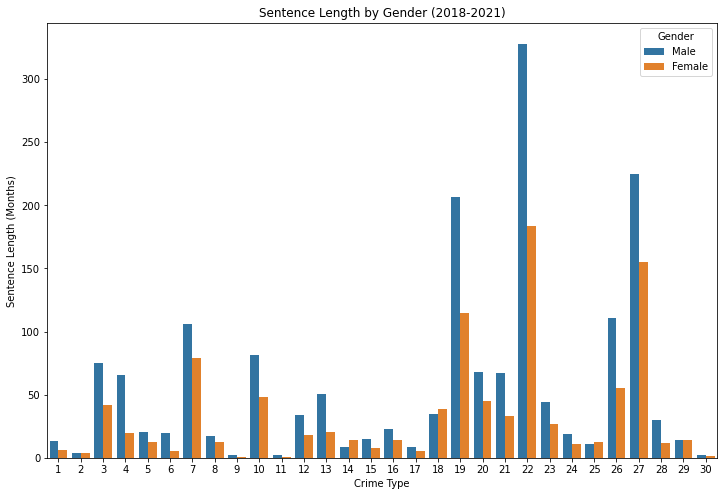

In [13]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df['crime_type'], y=df['sentence_length'], hue=df['gender'], ci=None)
plt.title('Sentence Length by Gender (2018-2021)')
plt.xlabel('Crime Type')
plt.ylabel('Sentence Length (Months)')
plt.legend(title='Gender', labels=['Male', 'Female']);

Men tend to have a longer sentencing length than women

In [14]:
crimes_selected = df[df['crime_type'].isin([3, 4, 10, 12, 13, 19, 20, 21, 22, 26, 27])]

In [15]:
crime_dict = {1:'Administration of Justice',2:'Antitrust',3:'Arson',4:'Assault',5:'Bribery/Corruption',6:'Burglary/Trespass',
              7:'Child Pornography',8:'Commercialized Vice',9:'Drug Possession',10:'Drug Trafficking',11:'Environmental',
              12:'Extortion/Racketeering',13:'Firearms',14:'Food and Drug',15:'Forgery/Counter/Copyright',16:'Fraud/Theft/Embezzlement',
              17:'Immigration',18:'Individual Rights',19:'Kidnapping',20:'Manslaughter',21:'Money Launder',22:'Murder',
              23:'National Defense',24:'Obscenity/Other Sex Offenses',25:'Prison Offenses',26:'Robbery',27:'Sex Abuse',
              28:'Stalking/Harassing',29:'Tax',30:'Other'}

crimes_selected['crime_type'] = [crime_dict.get(i) for i in crimes_selected['crime_type']]

In [16]:
crimes_selected['crime_type'].value_counts()

Drug Trafficking          66326
Firearms                  29148
Robbery                    5590
Money Launder              4024
Sex Abuse                  3838
Assault                    2580
Murder                     1110
Extortion/Racketeering      632
Kidnapping                  339
Arson                       239
Manslaughter                214
Name: crime_type, dtype: int64

Selected some crimes that were most frequent, had the highest sentences and included the crimes that women were sentenced higher than men

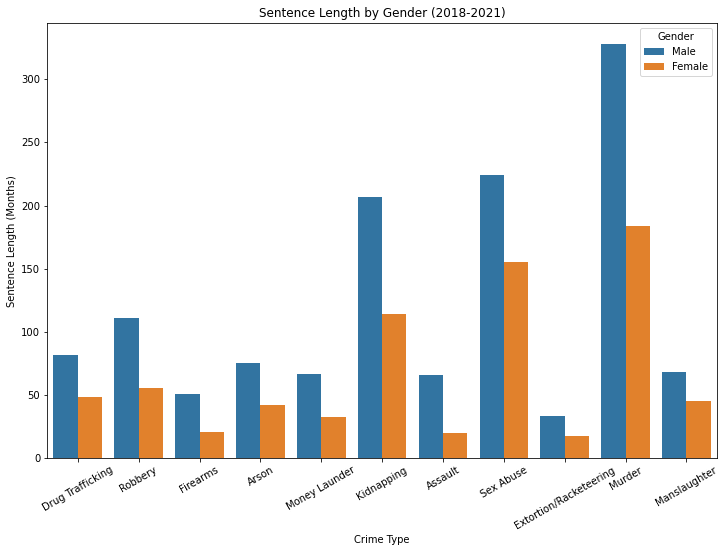

In [17]:
plt.figure(figsize=(12, 8))
sns.barplot(x=crimes_selected['crime_type'], y=crimes_selected['sentence_length'], hue=crimes_selected['gender'], ci=None)
plt.title('Sentence Length by Gender (2018-2021)')
plt.xlabel('Crime Type')
plt.xticks(rotation=30)
plt.ylabel('Sentence Length (Months)')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.savefig('../figures/gender_selected_crime');

In [18]:
# Avg sentence length for male defendants
df[df['gender']==0]['sentence_length'].mean()

45.11723394510268

In [19]:
# Avg sentence length for female defendants
df[df['gender']==1]['sentence_length'].mean()

27.41552569572693

### Deviation from guideline (gender)

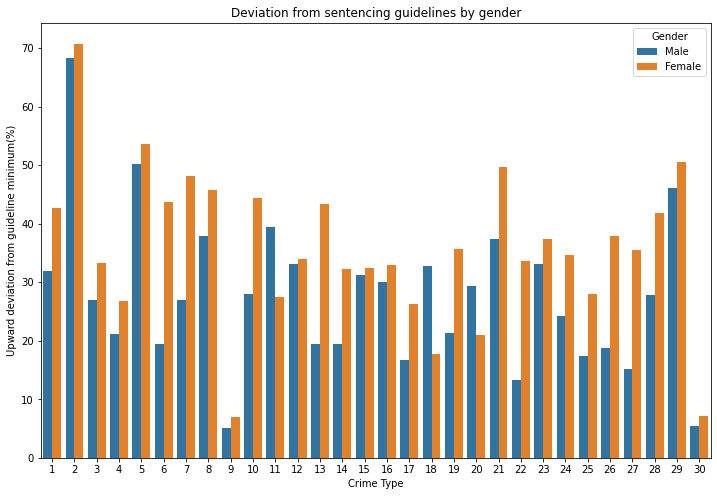

In [20]:
plt.figure(figsize=(12, 8))

sns.barplot(x=df['crime_type'], y=df['guideline_var_pct'], hue=df['gender'], ci=None)
plt.title('Deviation from sentencing guidelines by gender')
plt.xlabel('Crime Type')
plt.ylabel('Upward deviation from guideline minimum(%)')
plt.legend(title='Gender', labels=['Male', 'Female']);

In [21]:
df['gender'].value_counts()

0.0    216149
1.0     31406
Name: gender, dtype: int64

In [22]:
# Avg deviation for male defendants
df[df['gender']==0]['guideline_var_pct'].mean()

21.89816120657404

In [23]:
# Avg deviation for female defendants
df[df['gender']==1]['guideline_var_pct'].mean()

36.39166247602383

In [24]:
df[df['gender']==0]['count_convictons'].mean(), df[df['gender']==1]['count_convictons'].mean()  #similary number of counts

(1.354047439497754, 1.3641024008151308)

In [25]:
df[df['gender']==0]['dependents'].mean(), df[df['gender']==1]['dependents'].mean() # a similar percentage of defendants have dependents

(0.680387140352257, 0.6249124371139273)

In [26]:
df[df['gender']==0]['guideline_range'].value_counts(normalize=True), df[df['gender']==1]['guideline_range'].value_counts(normalize=True)

(0.0    0.521187
 1.0    0.168481
 2.0    0.130706
 4.0    0.058316
 5.0    0.050983
 3.0    0.050507
 6.0    0.019820
 Name: guideline_range, dtype: float64,
 0.0    0.647520
 1.0    0.180857
 2.0    0.086130
 3.0    0.027543
 4.0    0.025441
 5.0    0.022512
 6.0    0.009998
 Name: guideline_range, dtype: float64)

Women tend to receive lower sentences for similar crimes, but receive higher sentences relative to the guideline minimums.

## Black/White

### Sentence length by race (white/black)

In [27]:
# creating separate dataframe with only black and white defendants
df_bw = df[(df['race'] == 1) | (df['race'] == 2)]

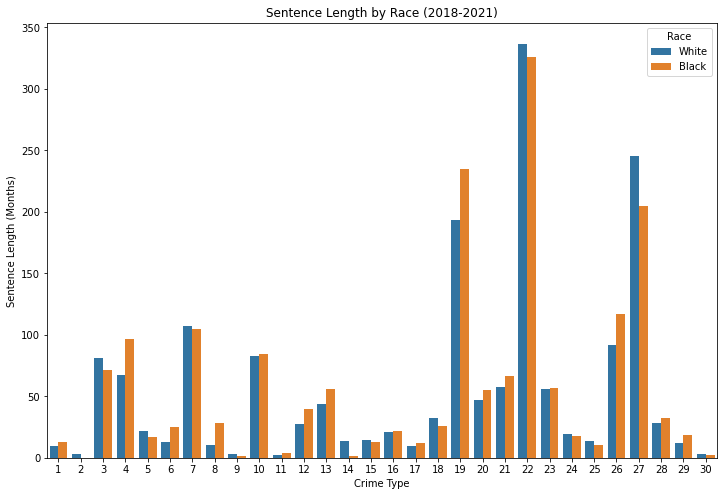

In [28]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df_bw['crime_type'], y=df_bw['sentence_length'], hue=df_bw['race'], ci=None)
plt.title('Sentence Length by Race (2018-2021)')
plt.xlabel('Crime Type')
plt.ylabel('Sentence Length (Months)')
plt.legend(title='Race', labels=['White', 'Black']);

In [29]:
# Avg sentence length for white defendants
df_bw[df_bw['race']==1]['sentence_length'].mean()

64.43660448769938

In [30]:
# Avg sentence length for black defendants
df_bw[df_bw['race']==2]['sentence_length'].mean()

67.57874142151944

### Deviation from guideline (white/black)

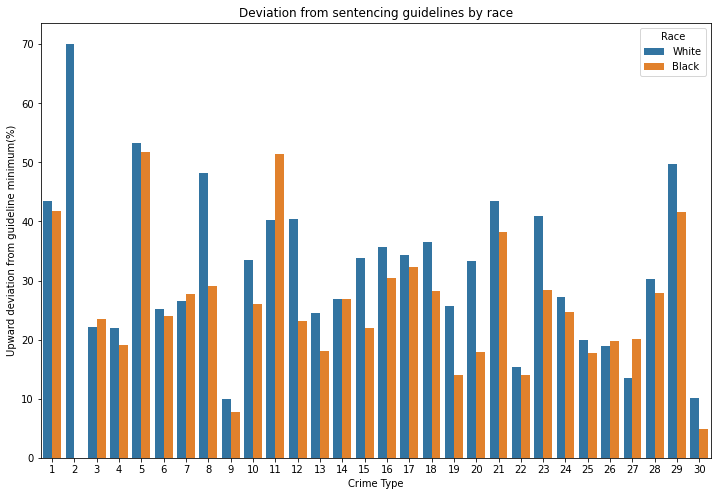

In [31]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df_bw['crime_type'], y=df_bw['guideline_var_pct'], hue=df_bw['race'], ci=None)
plt.title('Deviation from sentencing guidelines by race')
plt.xlabel('Crime Type')
plt.ylabel('Upward deviation from guideline minimum(%)')
plt.legend(title='Race', labels=['White', 'Black']);

In [32]:
# Avg deviation from guideline min for white defendants
df_bw[df_bw['race']==1]['guideline_var_pct'].mean()

30.75123874866824

In [33]:
# Avg deviation from guideline min for black defendants
df_bw[df_bw['race']==2]['guideline_var_pct'].mean()

23.57551236146286

## White/Non-white

### Sentence length by race (white/minority)

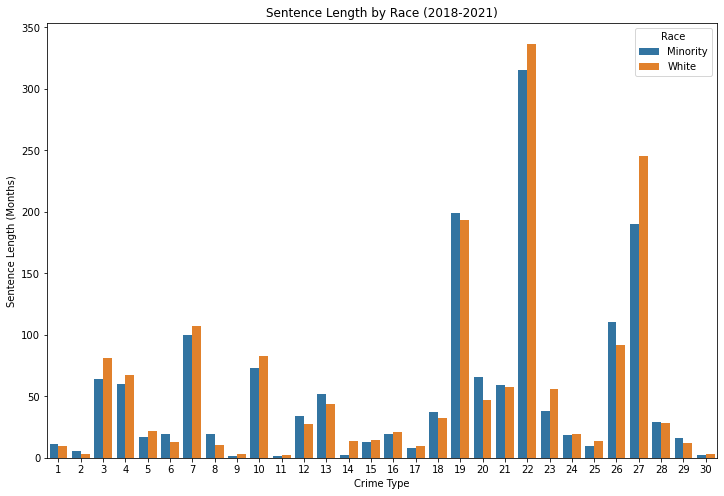

In [34]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df['crime_type'], y=df['sentence_length'], hue=df['white'], ci=None)
plt.title('Sentence Length by Race (2018-2021)')
plt.xlabel('Crime Type')
plt.ylabel('Sentence Length (Months)')
plt.legend(title='Race', labels=['Minority', 'White']);

### Deviation from guideline (white/minority)

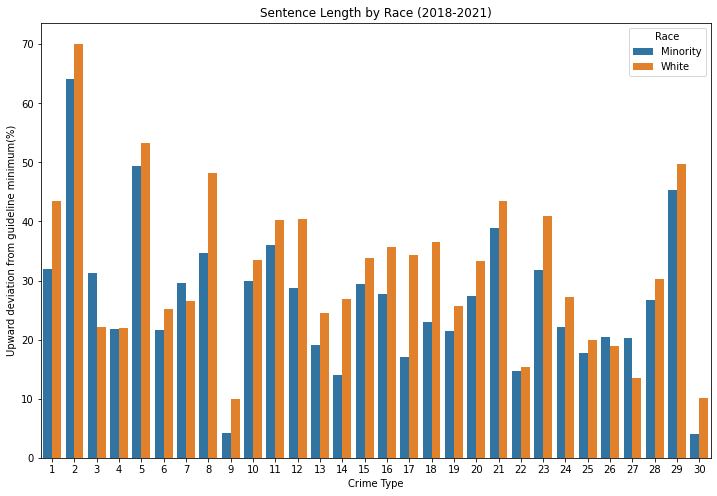

In [35]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df['crime_type'], y=df['guideline_var_pct'] , hue=df['white'], ci=None)
plt.title('Sentence Length by Race (2018-2021)')
plt.xlabel('Crime Type')
plt.ylabel('Upward deviation from guideline minimum(%)')
plt.legend(title='Race', labels=['Minority', 'White']);

In [36]:
df[df['white']==1]['guideline_var_pct'].mean()

30.75123874866824

In [37]:
df[df['white']==0]['guideline_var_pct'].mean()

22.04587894125623

# Education

### Deviation from guideline (education)

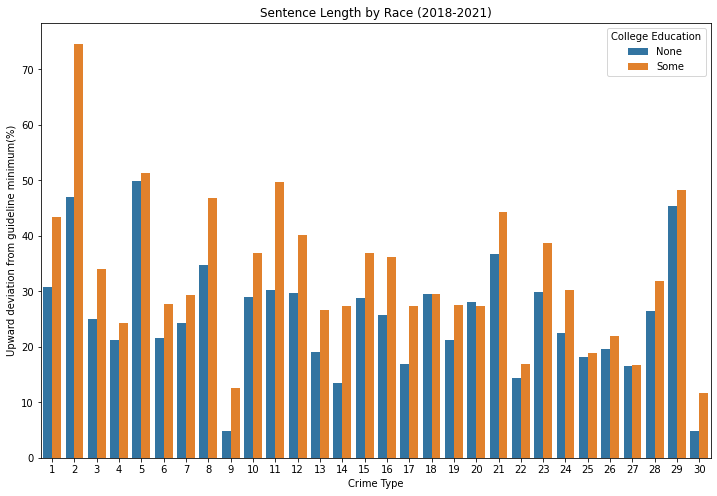

In [38]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df['crime_type'], y=df['guideline_var_pct'], hue=df['college'], ci=None)
plt.title('Sentence Length by Race (2018-2021)')
plt.xlabel('Crime Type')
plt.ylabel('Upward deviation from guideline minimum(%)')
plt.legend(title='College Education', labels=['None', 'Some']);

In [39]:
df[df['college']==1]['guideline_var_pct'].mean()

33.72500859696224

In [40]:
df[df['college']==0]['guideline_var_pct'].mean()

21.279746113965512

In [41]:
df['college'].value_counts()

0    198679
1     48876
Name: college, dtype: int64

In [42]:
df[df['college']==1]['crime_type'].value_counts().head()

10    15465
16    10295
13     5130
17     4076
7      2596
Name: crime_type, dtype: int64

Top 5 charges for those with some college education: Drug Trafficking, Fraud/Theft/Embezzlement, Firearms, Immigration, Child Pornography

In [43]:
df[df['college']==0]['crime_type'].value_counts().head()

17    86701
10    50861
13    24018
16    10175
26     4431
Name: crime_type, dtype: int64

Top 5 charges for those with no college education: Immigration, Drug Trafficking, Firearms, Fraud/Theft/Embezzlement, Robbery

## Violent Crimes

In [44]:
violent_crimes = [22,27,20,19,4,26,3,12,26]
df_vc = df[df['crime_type'].isin(violent_crimes)]
df_bw_vc = df_bw[df_bw['crime_type'].isin(violent_crimes)]

#### Guideline Deviation

In [45]:
# Guideline Deviation, Violent Crimes, White Defendants
df_vc[df_vc['race'] ==1]['guideline_var_pct'].mean()

18.006002893177396

In [46]:
# Guideline Deviation, Violent Crimes, Black Defendants
df_vc[df_vc['race'] ==2]['guideline_var_pct'].mean()

19.304163114581254

In [47]:
# Guideline Deviation, Violent Crimes, Minority Defendants
df_vc[df_vc['white'] ==0]['guideline_var_pct'].mean()

20.77297060725656

In [48]:
# Guideline Deviation, Violent Crimes, Female Defendants
df_vc[df_vc['gender'] ==1]['guideline_var_pct'].mean()

33.671001292677154

In [49]:
# Guideline Deviation, Violent Crimes, Male Defendants
df_vc[df_vc['gender'] ==0]['guideline_var_pct'].mean()

18.724819807326845

#### Sentence Length

In [50]:
# Guideline Deviation, Violent Crimes, White Defendants
df_vc[df_vc['race'] ==1]['sentence_length'].mean()

170.40836320191158

In [51]:
# Guideline Deviation, Violent Crimes, Black Defendants
df_vc[df_vc['race'] ==2]['sentence_length'].mean()

142.40804387568556

In [52]:
# Guideline Deviation, Violent Crimes, Minority Defendants
df_vc[df_vc['white'] ==0]['sentence_length'].mean()

130.670367867143

In [53]:
# Guideline Deviation, Violent Crimes, Female Defendants
df_vc[df_vc['gender'] ==1]['sentence_length'].mean()

76.19786535303777

In [54]:
# Guideline Deviation, Violent Crimes, Male Defendants
df_vc[df_vc['gender'] ==0]['sentence_length'].mean()

148.13141699189433

In [55]:
# Number of violent crime convictions by race
df_vc['race'].value_counts()

2    5470
1    4185
0    2678
3    1937
4     193
7      79
Name: race, dtype: int64

## By Region

region_dict = {'Connecticut':'Northeast', 'Maine':'Northeast', 'Massachusetts':'Northeast',\
'New Hampshire':'Northeast', 'Rhode Island':'Northeast', 'Vermont':'Northeast',\
'Delaware':'South', 'Maryland':'South', 'New Jersey':'Northeast',\
'New York':'Northeast', 'Pennsylvania':'Northeast','District of Columbia':'South',\
'Alabama':'South', 'Arkansas':'South', 'Florida':'South', 'Georgia':'South', 'Kentucky':'South',\
'Louisiana':'South', 'Mississippi':'South', 'Missouri':'South',\
'North Carolina':'South', 'South Carolina':'South', 'Tennessee':'South',\
'Virginia':'South', 'West Virginia':'South',\
'Illinois':'Midwest', 'Indiana':'Midwest', 'Iowa':'Midwest', 'Kansas':'Midwest',\
'Michigan':'Midwest', 'Minnesota':'Midwest', 'Nebraska':'Midwest',\
'North Dakota':'Midwest', 'Ohio':'Midwest', 'South Dakota':'Midwest', 'Wisconsin':'Midwest',\
'Arizona':'West', 'New Mexico':'West', 'Oklahoma':'South', 'Texas':'South',\
'Alaska':'West', 'California':'West', 'Colorado':'West', 'Hawaii':'West',\
'Idaho':'West', 'Montana':'West', 'Nevada':'West', 'Oregon':'West', 'Utah':'West',\
'Washington':'West', 'Wyoming':'West'}

In [56]:
df['region'].value_counts()

South        132969
West          64423
Midwest       28498
Northeast     21665
Name: region, dtype: int64

In [57]:
# creating databases for immigration and for all other offenses
df_imm = df[df['crime_type'] == 17]
df_non_imm = df[df['crime_type'] != 17]

In [58]:
# Percentage of total convictions that are for immigration, by region
df_imm['region'].value_counts() / df['region'].value_counts()

South        0.409118
West         0.487373
Midwest      0.100674
Northeast    0.097392
Name: region, dtype: float64

In [59]:
df.groupby('state')['crime_type'].value_counts()  #df['crime_type']).value_counts()

state    crime_type
Alabama  13            1227
         10            1064
         16             404
         17             338
         26             134
                       ... 
Wyoming  9                4
         29               4
         15               3
         14               1
         20               1
Name: crime_type, Length: 1357, dtype: int64

In [61]:
df.groupby('year_sentenced')['age'].count()

year_sentenced
2018    70194
2019    77430
2020    56039
2021    43892
Name: age, dtype: int64

#### Analysis of non-immigration convictions (by region)

<AxesSubplot:xlabel='region', ylabel='Count'>

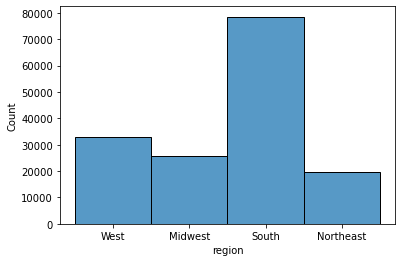

In [62]:
sns.histplot(df_non_imm['region']);

In [63]:
df_non_imm.columns

Index(['sentence_length', 'year_sentenced', 'sentence_type', 'guideline_range',
       'imprisoned', 'guideline_var_pct', 'dependents', 'count_convictons',
       'race', 'disposition', 'citizen', 'state', 'criminal_hist', 'drug_type',
       'case_type', 'age', 'weapon', 'presentence_stat', 'gender',
       'crime_type', 'region', 'college', 'white'],
      dtype='object')

In [67]:
df_non_imm[df_non_imm['race']==1].groupby('region')['guideline_var_pct'].mean()

region
Midwest      29.669382
Northeast    42.873725
South        25.232181
West         36.627396
Name: guideline_var_pct, dtype: float64

In [68]:
# Sentence length for white defendants by region
df_non_imm[df_non_imm['race']==1].groupby('region')['sentence_length'].mean()

region
Midwest      79.257035
Northeast    49.260321
South        72.116880
West         49.484927
Name: sentence_length, dtype: float64

In [69]:
# Sentence length for black defendants by region
df_non_imm[df_non_imm['race']==2].groupby('region')['sentence_length'].mean()

region
Midwest      71.318283
Northeast    62.669206
South        71.219883
West         48.256033
Name: sentence_length, dtype: float64

In [70]:
# Sentence length for minorities by region
df_non_imm[df_non_imm['white']==0].groupby('region')['sentence_length'].mean()

region
Midwest      69.617219
Northeast    56.311631
South        68.797909
West         42.216372
Name: sentence_length, dtype: float64

In [71]:
# Guideline variance for white defendants by region
df_non_imm[df_non_imm['race']==1].groupby('region')['guideline_var_pct'].mean()

region
Midwest      29.669382
Northeast    42.873725
South        25.232181
West         36.627396
Name: guideline_var_pct, dtype: float64

In [72]:
# Guideline variance for black defendants by region
df_non_imm[df_non_imm['race']==2].groupby('region')['guideline_var_pct'].mean()

region
Midwest      24.836601
Northeast    32.300255
South        20.044705
West         31.709762
Name: guideline_var_pct, dtype: float64

In [73]:
# Guideline variance for minority defendant by region
df_non_imm[df_non_imm['white']==0].groupby('region')['guideline_var_pct'].mean()

region
Midwest      25.592410
Northeast    34.594096
South        19.660831
West         36.540331
Name: guideline_var_pct, dtype: float64

In [74]:
# percentage of convictions where defendant is white(non-immigration charges)
df_non_imm.groupby('region')['white'].mean()

region
Midwest      0.361895
Northeast    0.315878
South        0.282911
West         0.270189
Name: white, dtype: float64

In [75]:
df.columns

Index(['sentence_length', 'year_sentenced', 'sentence_type', 'guideline_range',
       'imprisoned', 'guideline_var_pct', 'dependents', 'count_convictons',
       'race', 'disposition', 'citizen', 'state', 'criminal_hist', 'drug_type',
       'case_type', 'age', 'weapon', 'presentence_stat', 'gender',
       'crime_type', 'region', 'college', 'white'],
      dtype='object')

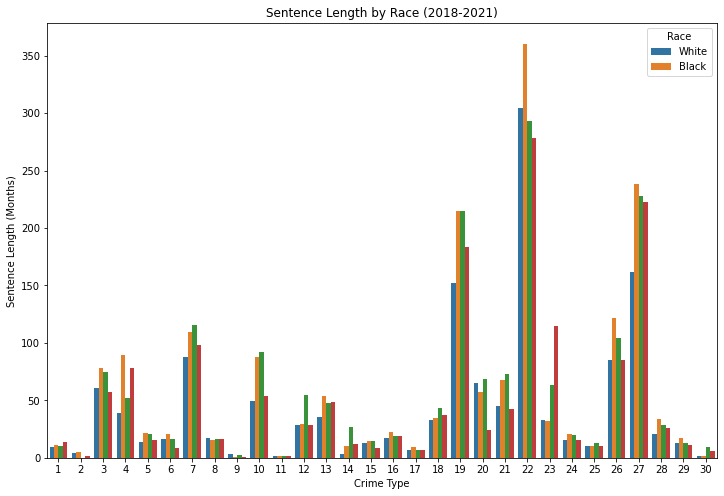

In [78]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df['crime_type'], y=df['sentence_length'], hue=df['region'], ci=None)
plt.title('Sentence Length by Race (2018-2021)')
plt.xlabel('Crime Type')
plt.ylabel('Sentence Length (Months)')
plt.legend(title='Race', labels=['White', 'Black']);